In [ ]:
#"""E-Commerce Customer Insights and Churn Analysis Complete Python Analysis Script"""

In [ ]:
#1.Load and preprocess the e-commerce dataset

In [13]:
import pandas as pd
import numpy as np

In [19]:
df = pd.read_csv(r"C:\Users\sumeet\Desktop\customer churn\E Commerce Customer Insights and Churn Dataset.csv")
print(df)

     order_id customer_id  age product_id   country signup_date  \
0     ORD5000    CUST1000   39    PROD200    Canada    1/7/2021   
1     ORD5001    CUST1001   61    PROD201       USA  10/19/2020   
2     ORD5002    CUST1002   26    PROD202  Pakistan   6/10/2023   
3     ORD5003    CUST1003   54    PROD203     India   7/30/2023   
4     ORD5004    CUST1004   50    PROD204     India   12/9/2020   
...       ...         ...  ...        ...       ...         ...   
1995  ORD6995    CUST2995   27   PROD2195        UK   7/11/2021   
1996  ORD6996    CUST2996   59   PROD2196    Canada  11/26/2022   
1997  ORD6997    CUST2997   41   PROD2197     India   4/20/2022   
1998  ORD6998    CUST2998   20   PROD2198       USA   5/16/2021   
1999  ORD6999    CUST2999   54   PROD2199     India   1/31/2023   

     last_purchase_date  cancellations_count subscription_status order_date  \
0             2/21/2023                    0              active  8/20/2024   
1             12/8/2021              

In [22]:
print(f"Current columns: {df.columns.tolist()}")

Current columns: ['order_id', 'customer_id', 'age', 'product_id', 'country', 'signup_date', 'last_purchase_date', 'cancellations_count', 'subscription_status', 'order_date', 'unit_price', 'quantity', 'purchase_frequency', 'preferred_category', 'product_name', 'category', 'gender']


In [ ]:
# Convert date columns

In [23]:
from datetime import datetime
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_purchase_date'] = pd.to_datetime(df['last_purchase_date'])
df['order_date'] = pd.to_datetime(df['order_date'])
print(df[['signup_date', 'last_purchase_date', 'order_date']].head())


  signup_date last_purchase_date order_date
0  2021-01-07         2023-02-21 2024-08-20
1  2020-10-19         2021-12-08 2025-07-17
2  2023-06-10         2023-09-04 2025-03-12
3  2023-07-30         2024-02-20 2024-09-19
4  2020-12-09         2024-09-14 2024-08-08


In [2]:
 # Calculate new features

In [24]:
df['revenue'] = df['unit_price'] * df['quantity']
df['days_since_signup'] = (datetime.now() - df['signup_date']).dt.days
df['days_since_last_purchase'] = (datetime.now() - df['last_purchase_date']).dt.days
df['customer_tenure_days'] = (df['last_purchase_date'] - df['signup_date']).dt.days
print(df[['signup_date', 'days_since_signup', 'unit_price', 'quantity', 'revenue']].head())


  signup_date  days_since_signup  unit_price  quantity  revenue
0  2021-01-07               1868       78.21         5   391.05
1  2020-10-19               1948       64.02         8   512.16
2  2023-06-10                984      604.14         2  1208.28
3  2023-07-30                934       84.66         4   338.64
4  2020-12-09               1897       62.66         7   438.62


In [ ]:
# Age groups

In [25]:
df['age_group'] = pd.cut(df['age'], 
 bins=[0, 25, 35, 45, 55, 100], 
 labels=['Young Adults', 'Young Professionals', 'Mid-Career', 'Experienced', 'Seniors'])
print(df['age_group'].value_counts())


age_group
Seniors                551
Experienced            433
Mid-Career             375
Young Professionals    354
Young Adults           287
Name: count, dtype: int64


In [ ]:
# Revenue groups

In [27]:
df['revenue_category'] = pd.qcut(df['revenue'], q=4, 
    labels=['Low', 'Medium', 'High', 'Premium'])
print(df['revenue_category'].value_counts())

revenue_category
Low        500
Medium     500
High       500
Premium    500
Name: count, dtype: int64


In [ ]:
# 2. EXPLORATORY DATA ANALYSIS

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
def perform_eda(df):
    """Comprehensive exploratory data analysis"""
    print("=" * 80)
    print("E-COMMERCE DATASET - EXPLORATORY DATA ANALYSIS")
    print("=" * 80)
    
    print("\n1. DATASET OVERVIEW")
    print(f"Total Records: {len(df):,}")
    print(f"Total Customers: {df['customer_id'].nunique():,}")
    print(f"Total Orders: {df['order_id'].nunique():,}")
    print(f"Date Range: {df['order_date'].min()} to {df['order_date'].max()}")
    
    print("\n2. REVENUE METRICS")
    print(f"Total Revenue: ${df['revenue'].sum():,.2f}")
    print(f"Average Order Value: ${df['revenue'].mean():,.2f}")
    print(f"Median Order Value: ${df['revenue'].median():,.2f}")
    print(f"Max Order Value: ${df['revenue'].max():,.2f}")
    
    print("\n3. SUBSCRIPTION STATUS DISTRIBUTION")
    print(df['subscription_status'].value_counts())
    print(f"\nChurn Rate: {(df['subscription_status'] == 'cancelled').sum() / len(df) * 100:.2f}%")
    
    print("\n4. GEOGRAPHIC DISTRIBUTION")
    print(df['country'].value_counts())
    
    print("\n5. CATEGORY PERFORMANCE")
    category_revenue = df.groupby('category')['revenue'].agg(['sum', 'mean', 'count'])
    category_revenue.columns = ['Total Revenue', 'Avg Revenue', 'Orders']
    print(category_revenue.sort_values('Total Revenue', ascending=False))
    
    print("\n6. CUSTOMER DEMOGRAPHICS")
    print(f"Age Range: {df['age'].min()} - {df['age'].max()}")
    print(f"Average Age: {df['age'].mean():.1f}")
    print("\nGender Distribution:")
    print(df['gender'].value_counts())

print("\n--- DETAILED DATA PREVIEW ---")
print(df[['customer_id', 'age_group', 'revenue', 'days_since_signup']].head())


--- DETAILED DATA PREVIEW ---
  customer_id            age_group  revenue  days_since_signup
0    CUST1000           Mid-Career   391.05               1868
1    CUST1001              Seniors   512.16               1948
2    CUST1002  Young Professionals  1208.28                984
3    CUST1003          Experienced   338.64                934
4    CUST1004          Experienced   438.62               1897


In [ ]:
# 3. CUSTOMER SEGMENTATION - RFM ANALYSIS

In [34]:
def rfm_analysis(df):
    """Perform RFM (Recency, Frequency, Monetary) analysis"""
    print("\n" + "=" * 80)
    print("RFM ANALYSIS")
    print("=" * 80)
    
    # Calculate RFM metrics per customer
    rfm = df.groupby('customer_id').agg({
        'days_since_last_purchase': 'min',  # Recency
        'order_id': 'count',                 # Frequency
        'revenue': 'sum'                     # Monetary
    }).reset_index()
    
    rfm.columns = ['customer_id', 'Recency', 'Frequency', 'Monetary']
    
    # Create RFM scores (1-5, where 5 is best)
    rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=False, duplicates='drop') + 1
    rfm['F_Score'] = pd.qcut(rfm['Frequency'], 5, labels=False, duplicates='drop') + 1
    rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=False, duplicates='drop') + 1
    
    # Reverse recency score (lower days = better)
    rfm['R_Score'] = 6 - rfm['R_Score']
    
    # Calculate RFM score
    rfm['RFM_Score'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']
    
    # Segment customers
    def segment_customer(row):
        if row['RFM_Score'] >= 13:
            return 'Champions'
        elif row['RFM_Score'] >= 10:
            return 'Loyal Customers'
        elif row['RFM_Score'] >= 7:
            return 'Potential Loyalists'
        elif row['RFM_Score'] >= 5:
            return 'At Risk'
        else:
            return 'Lost'
    
    rfm['Segment'] = rfm.apply(segment_customer, axis=1)
    
    print("\nCustomer Segments:")
    print(rfm['Segment'].value_counts())
    
    print("\nSegment Metrics:")
    segment_summary = rfm.groupby('Segment').agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': 'mean',
        'customer_id': 'count'
    }).round(2)
    segment_summary.columns = ['Avg Recency (days)', 'Avg Frequency', 'Avg Revenue', 'Customer Count']
    print(segment_summary)
    
    return rfm
rfm_results = rfm_analysis(df)
#Top 10 'Champions' (the customers you should reward!)
print("\n--- TOP 10 CHAMPIONS ---")
champions = rfm_results[rfm_results['Segment'] == 'Champions'].sort_values('Monetary', ascending=False)
print(champions.head(10))
#segment brings in the most money
print("\n--- REVENUE BY SEGMENT ---")
print(rfm_results.groupby('Segment')['Monetary'].sum().sort_values(ascending=False))


RFM ANALYSIS

Customer Segments:
Segment
Lost    2000
Name: count, dtype: int64

Segment Metrics:
         Avg Recency (days)  Avg Frequency  Avg Revenue  Customer Count
Segment                                                                
Lost                 812.22            1.0      1025.85            2000

--- TOP 10 CHAMPIONS ---
Empty DataFrame
Columns: [customer_id, Recency, Frequency, Monetary, R_Score, F_Score, M_Score, RFM_Score, Segment]
Index: []

--- REVENUE BY SEGMENT ---
Segment
Lost    2051690.65
Name: Monetary, dtype: float64


In [38]:
!pip install scikit-learn

In [ ]:
# 4. CHURN PREDICTION FEATURES

In [41]:
def prepare_churn_features(df):
    """Prepare features for churn prediction"""
    print("\n" + "=" * 80)
    print("CHURN PREDICTION - FEATURE ENGINEERING")
    print("=" * 80)
    
    # Aggregate by customer
    customer_features = df.groupby('customer_id').agg({
        'age': 'first',
        'country': 'first',
        'gender': 'first',
        'days_since_signup': 'first',
        'days_since_last_purchase': 'min',
        'cancellations_count': 'max',
        'purchase_frequency': 'mean',
        'revenue': ['sum', 'mean', 'std'],
        'quantity': ['sum', 'mean'],
        'subscription_status': 'first'
    }).reset_index()
    
    customer_features.columns = ['_'.join(col).strip('_') for col in customer_features.columns]
    
    # Create binary churn label
    customer_features['churned'] = (customer_features['subscription_status_first'] == 'cancelled').astype(int)
    
    print(f"\nTotal Customers: {len(customer_features)}")
    print(f"Churned Customers: {customer_features['churned'].sum()}")
    print(f"Churn Rate: {customer_features['churned'].mean() * 100:.2f}%")
    
    # Key indicators of churn
    print("\n\nChurn Indicators:")
    print(f"Avg Cancellations (Churned): {customer_features[customer_features['churned']==1]['cancellations_count_max'].mean():.2f}")
    print(f"Avg Cancellations (Active): {customer_features[customer_features['churned']==0]['cancellations_count_max'].mean():.2f}")
    
    print(f"\nAvg Days Since Last Purchase (Churned): {customer_features[customer_features['churned']==1]['days_since_last_purchase_min'].mean():.1f}")
    print(f"Avg Days Since Last Purchase (Active): {customer_features[customer_features['churned']==0]['days_since_last_purchase_min'].mean():.1f}")
    
    return customer_features
churn_df = prepare_churn_features(df)

#The most "At Risk" customers (High cancellations, many days since last purchase)
print("\n--- TOP 10 HIGHEST RISK PROFILE (NOT YET CANCELLED) ---")
high_risk = churn_df[churn_df['churned'] == 0].sort_values('days_since_last_purchase_min', ascending=False)
print(high_risk[['customer_id', 'days_since_last_purchase_min', 'cancellations_count_max']].head(10))

# The correlation (Which feature actually causes churn?)
numeric_churn = churn_df.select_dtypes(include=['number'])
print("\n--- CORRELATION WITH CHURN ---")
print(numeric_churn.corr()['churned'].sort_values(ascending=False))
print(churn_df.head(1))



CHURN PREDICTION - FEATURE ENGINEERING

Total Customers: 2000
Churned Customers: 493
Churn Rate: 24.65%


Churn Indicators:
Avg Cancellations (Churned): 2.48
Avg Cancellations (Active): 2.43

Avg Days Since Last Purchase (Churned): 837.0
Avg Days Since Last Purchase (Active): 804.1

--- TOP 10 HIGHEST RISK PROFILE (NOT YET CANCELLED) ---
     customer_id  days_since_last_purchase_min  cancellations_count_max
1741    CUST2741                          1950                        4
1875    CUST2875                          1927                        2
1125    CUST2125                          1926                        1
1232    CUST2232                          1884                        0
758     CUST1758                          1871                        3
625     CUST1625                          1869                        2
1969    CUST2969                          1858                        4
1540    CUST2540                          1851                        3
597     CUS

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [ ]:
# 5. MACHINE LEARNING - CHURN PREDICTION MODEL

In [43]:
def build_churn_model(customer_features):
    # Prepare features
    features = customer_features.copy()
    
    # Encode categorical variables
    le_country = LabelEncoder()
    le_gender = LabelEncoder()
    
    features['country_encoded'] = le_country.fit_transform(features['country_first'])
    features['gender_encoded'] = le_gender.fit_transform(features['gender_first'])
    
    # Select features for modeling
    feature_cols = ['age_first', 'days_since_signup_first', 'days_since_last_purchase_min',
                   'cancellations_count_max', 'purchase_frequency_mean', 'revenue_sum',
                   'revenue_mean', 'quantity_sum', 'country_encoded', 'gender_encoded']
    
    X = features[feature_cols].fillna(0)
    y = features['churned']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    
    # Train model
    model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Evaluation
    print("\nModel Performance:")
    print(classification_report(y_test, y_pred, target_names=['Active', 'Churned']))
    
    print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'Feature': feature_cols,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("\nTop 5 Most Important Features:")
    print(feature_importance.head())

    print("\n" + "=" * 80)
    print("CHURN PREDICTION MODEL")
    print("=" * 80)
    
    
    return model, feature_importance
model, importance_df = build_churn_model(churn_df)
print("\n--- ACTIONABLE INSIGHT ---")
top_reason = importance_df.iloc[0]['Feature']
print(f"The biggest predictor of churn is: {top_reason}")
print("Marketing should focus on improving this metric to retain customers.")
    


Model Performance:
              precision    recall  f1-score   support

      Active       0.75      0.99      0.86       452
     Churned       0.25      0.01      0.01       148

    accuracy                           0.75       600
   macro avg       0.50      0.50      0.44       600
weighted avg       0.63      0.75      0.65       600


ROC-AUC Score: 0.4969

Top 5 Most Important Features:
                        Feature  Importance
6                  revenue_mean    0.144782
2  days_since_last_purchase_min    0.142764
1       days_since_signup_first    0.141316
5                   revenue_sum    0.141112
4       purchase_frequency_mean    0.114519

CHURN PREDICTION MODEL

--- ACTIONABLE INSIGHT ---
The biggest predictor of churn is: revenue_mean
Marketing should focus on improving this metric to retain customers.


In [ ]:
# 6. CUSTOMER LIFETIME VALUE (CLV) CALCULATION

In [45]:
def calculate_clv(df):
    """Calculate Customer Lifetime Value"""
    print("\n" + "=" * 80)
    print("CUSTOMER LIFETIME VALUE (CLV) ANALYSIS")
    print("=" * 80)
    
    customer_clv = df.groupby('customer_id').agg({
        'revenue': 'sum',
        'order_id': 'count',
        'customer_tenure_days': 'max',
        'subscription_status': 'first'
    }).reset_index()
    
    customer_clv.columns = ['customer_id', 'total_revenue', 'total_orders', 'tenure_days', 'status']
    
    # Calculate average order value and purchase frequency
    customer_clv['avg_order_value'] = customer_clv['total_revenue'] / customer_clv['total_orders']
    customer_clv['purchase_frequency'] = customer_clv['total_orders'] / (customer_clv['tenure_days'] / 365 + 1)
    
    # Simple CLV calculation (Historical)
    customer_clv['historical_clv'] = customer_clv['total_revenue']
    
    # Predicted CLV (simplified - assumes 2 years retention)
    retention_rate = 0.7  # Assume 70% retention
    discount_rate = 0.1   # 10% discount rate
    
    customer_clv['predicted_clv'] = (
        customer_clv['avg_order_value'] * 
        customer_clv['purchase_frequency'] * 
        2 *  # 2 years projection
        retention_rate
    )
    
    print("\nCLV Summary Statistics:")
    print(customer_clv[['historical_clv', 'predicted_clv']].describe())
    
    print("\n\nTop 10 Customers by CLV:")
    print(customer_clv.nlargest(10, 'predicted_clv')[['customer_id', 'total_revenue', 'total_orders', 'predicted_clv']])
    
    return customer_clv
clv_df = calculate_clv(df)
#Active vs. Cancelled customers' future value
print("\n--- FUTURE VALUE BY STATUS ---")
print(clv_df.groupby('status')['predicted_clv'].mean().round(2))

#Final Check: See the "Whales" (High Value Customers)
print("\n--- TOP 5 MOST VALUABLE FUTURE CUSTOMERS ---")
print(clv_df.sort_values('predicted_clv', ascending=False).head(5))



CUSTOMER LIFETIME VALUE (CLV) ANALYSIS

CLV Summary Statistics:
       historical_clv  predicted_clv
count     2000.000000    2000.000000
mean      1025.845325     614.208555
std        560.793690     459.242586
min         22.290000       7.265138
25%        551.937500     277.064264
50%       1057.230000     526.100244
75%       1494.682500     812.222939
max       1998.080000    2632.417824


Top 10 Customers by CLV:
     customer_id  total_revenue  total_orders  predicted_clv
1268    CUST2268        1988.48             1    2632.417824
1404    CUST2404        1923.40             1    2533.137629
847     CUST1847        1978.02             1    2441.469130
473     CUST1473        1778.40             1    2404.133333
1371    CUST2371        1897.80             1    2382.741523
394     CUST1394        1741.68             1    2348.280950
1848    CUST2848        1909.84             1    2307.158960
1934    CUST2934        1994.70             1    2275.204687
1979    CUST2979        18

In [46]:
import matplotlib.pyplot as plt

In [ ]:
# 7. VISUALIZATIONS

In [52]:
def create_visualizations(df, output_dir='/home/claude'):
    """Create comprehensive visualizations"""
    print("\n" + "=" * 80)
    print("GENERATING VISUALIZATIONS")
    print("=" * 80)
    
    # 1. Revenue by Category
    plt.figure(figsize=(12, 6))
    category_revenue = df.groupby('category')['revenue'].sum().sort_values(ascending=False)
    category_revenue.plot(kind='bar', color='steelblue')
    plt.title('Total Revenue by Category', fontsize=16, fontweight='bold')
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Revenue ($)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/viz_revenue_by_category.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # 2. Churn Rate by Country
    plt.figure(figsize=(12, 6))
    churn_by_country = df.groupby('country')['subscription_status'].apply(
        lambda x: (x == 'cancelled').sum() / len(x) * 100
    ).sort_values(ascending=False)
    churn_by_country.plot(kind='bar', color='coral')
    plt.title('Churn Rate by Country', fontsize=16, fontweight='bold')
    plt.xlabel('Country', fontsize=12)
    plt.ylabel('Churn Rate (%)', fontsize=12)
    plt.xticks(rotation=45)
    plt.axhline(y=churn_by_country.mean(), color='red', linestyle='--', label=f'Average: {churn_by_country.mean():.1f}%')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'{output_dir}/viz_churn_by_country.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # 3. Age Distribution by Subscription Status
    plt.figure(figsize=(12, 6))
    for status in df['subscription_status'].unique():
        subset = df[df['subscription_status'] == status]
        plt.hist(subset['age'], alpha=0.5, label=status, bins=20)
    plt.title('Age Distribution by Subscription Status', fontsize=16, fontweight='bold')
    plt.xlabel('Age', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'{output_dir}/viz_age_distribution.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # 4. Revenue Trends Over Time
    plt.figure(figsize=(14, 6))
    monthly_revenue = df.groupby(df['order_date'].dt.to_period('M'))['revenue'].sum()
    monthly_revenue.plot(kind='line', marker='o', color='green', linewidth=2)
    plt.title('Monthly Revenue Trend', fontsize=16, fontweight='bold')
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Revenue ($)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/viz_revenue_trend.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # 5. Cancellations vs Revenue (Scatter)
    plt.figure(figsize=(10, 6))
    plt.scatter(df['cancellations_count'], df['revenue'], alpha=0.5, c=df['subscription_status'].map({'active': 'green', 'cancelled': 'red', 'paused': 'orange'}))
    plt.title('Cancellations Count vs Revenue', fontsize=16, fontweight='bold')
    plt.xlabel('Cancellations Count', fontsize=12)
    plt.ylabel('Revenue ($)', fontsize=12)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/viz_cancellations_vs_revenue.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    print("\n✓ Visualizations saved successfully!")
    print("  - viz_revenue_by_category.png")
    print("  - viz_churn_by_country.png")
    print("  - viz_age_distribution.png")
    print("  - viz_revenue_trend.png")
    print("  - viz_cancellations_vs_revenue.png")



     order_id customer_id  age product_id   country signup_date  \
0     ORD5000    CUST1000   39    PROD200    Canada  2021-01-07   
1     ORD5001    CUST1001   61    PROD201       USA  2020-10-19   
2     ORD5002    CUST1002   26    PROD202  Pakistan  2023-06-10   
3     ORD5003    CUST1003   54    PROD203     India  2023-07-30   
4     ORD5004    CUST1004   50    PROD204     India  2020-12-09   
...       ...         ...  ...        ...       ...         ...   
1995  ORD6995    CUST2995   27   PROD2195        UK  2021-07-11   
1996  ORD6996    CUST2996   59   PROD2196    Canada  2022-11-26   
1997  ORD6997    CUST2997   41   PROD2197     India  2022-04-20   
1998  ORD6998    CUST2998   20   PROD2198       USA  2021-05-16   
1999  ORD6999    CUST2999   54   PROD2199     India  2023-01-31   

     last_purchase_date  cancellations_count subscription_status order_date  \
0            2023-02-21                    0              active 2024-08-20   
1            2021-12-08              

In [ ]:
# 8. BUSINESS INSIGHTS & RECOMMENDATIONS

In [55]:
def generate_insights(df):
    """Generate business insights and recommendations"""
    print("\n" + "=" * 80)
    print("BUSINESS INSIGHTS & RECOMMENDATIONS")
    print("=" * 80)
    
    # Calculate key metrics
    churn_rate = (df['subscription_status'] == 'cancelled').sum() / len(df) * 100
    avg_cancellations_churned = df[df['subscription_status'] == 'cancelled']['cancellations_count'].mean()
    top_country = df.groupby('country')['revenue'].sum().idxmax()
    top_category = df.groupby('category')['revenue'].sum().idxmax()
    
    print("\n1. CHURN INSIGHTS:")
    print(f"   • Overall churn rate is {churn_rate:.1f}%")
    print(f"   • Churned customers averaged {avg_cancellations_churned:.1f} cancellations")
    print("   • RECOMMENDATION: Implement intervention after 2nd cancellation")
    
    print("\n2. GEOGRAPHIC INSIGHTS:")
    print(f"   • {top_country} generates the highest revenue")
    print("   • RECOMMENDATION: Focus marketing and retention efforts in top markets")
    
    print("\n3. PRODUCT INSIGHTS:")
    print(f"   • {top_category} is the best-performing category")
    print("   • RECOMMENDATION: Expand product line in high-revenue categories")
    
    print("\n4. CUSTOMER LIFETIME VALUE:")
    customer_clv = df.groupby('customer_id')['revenue'].sum()
    print(f"   • Average CLV: ${customer_clv.mean():,.2f}")
    print(f"   • Top 20% customers contribute: {(customer_clv.nlargest(int(len(customer_clv)*0.2)).sum() / customer_clv.sum() * 100):.1f}% of revenue")
    print("   • RECOMMENDATION: Launch VIP/loyalty program for high-value customers")
    
    print("\n5. RETENTION STRATEGIES:")
    print("   • Target customers with 30+ days since last purchase")
    print("   • Offer personalized discounts based on preferred categories")
    print("   • Implement win-back campaigns for paused subscriptions")

# Call the function (if not already done in your main block)
generate_insights(df)



BUSINESS INSIGHTS & RECOMMENDATIONS

1. CHURN INSIGHTS:
   • Overall churn rate is 24.6%
   • Churned customers averaged 2.5 cancellations
   • RECOMMENDATION: Implement intervention after 2nd cancellation

2. GEOGRAPHIC INSIGHTS:
   • Germany generates the highest revenue
   • RECOMMENDATION: Focus marketing and retention efforts in top markets

3. PRODUCT INSIGHTS:
   • Clothing is the best-performing category
   • RECOMMENDATION: Expand product line in high-revenue categories

4. CUSTOMER LIFETIME VALUE:
   • Average CLV: $1,025.85
   • Top 20% customers contribute: 35.0% of revenue
   • RECOMMENDATION: Launch VIP/loyalty program for high-value customers

5. RETENTION STRATEGIES:
   • Target customers with 30+ days since last purchase
   • Offer personalized discounts based on preferred categories
   • Implement win-back campaigns for paused subscriptions


In [ ]:
#CHARTS

In [57]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

In [58]:
# ── Global style ──────────────────────────────────────────────────────────────
BG      = '#0d0f1a'
CARD    = '#151827'
ACC1    = '#5eebd0'   # teal
ACC2    = '#f97cbe'   # pink
ACC3    = '#ffd166'   # amber
ACC4    = '#7b61ff'   # violet
GREY    = '#8888aa'
WHITE   = '#e8e8f4'

plt.rcParams.update({
    'figure.facecolor':  BG,
    'axes.facecolor':    CARD,
    'axes.edgecolor':    '#2a2d45',
    'axes.labelcolor':   WHITE,
    'axes.titlecolor':   WHITE,
    'axes.titlepad':     14,
    'axes.titlesize':    13,
    'axes.labelsize':    10,
    'xtick.color':       GREY,
    'ytick.color':       GREY,
    'text.color':        WHITE,
    'grid.color':        '#1e2135',
    'grid.linewidth':    0.7,
    'font.family':       'DejaVu Sans',
    'legend.facecolor':  '#1a1d2e',
    'legend.edgecolor':  '#2a2d45',
})

PALETTE_CAT = [ACC1, ACC2, ACC3, ACC4, '#ff8c42', '#06d6a0']

In [ ]:
# 1 — SCATTERPLOTS

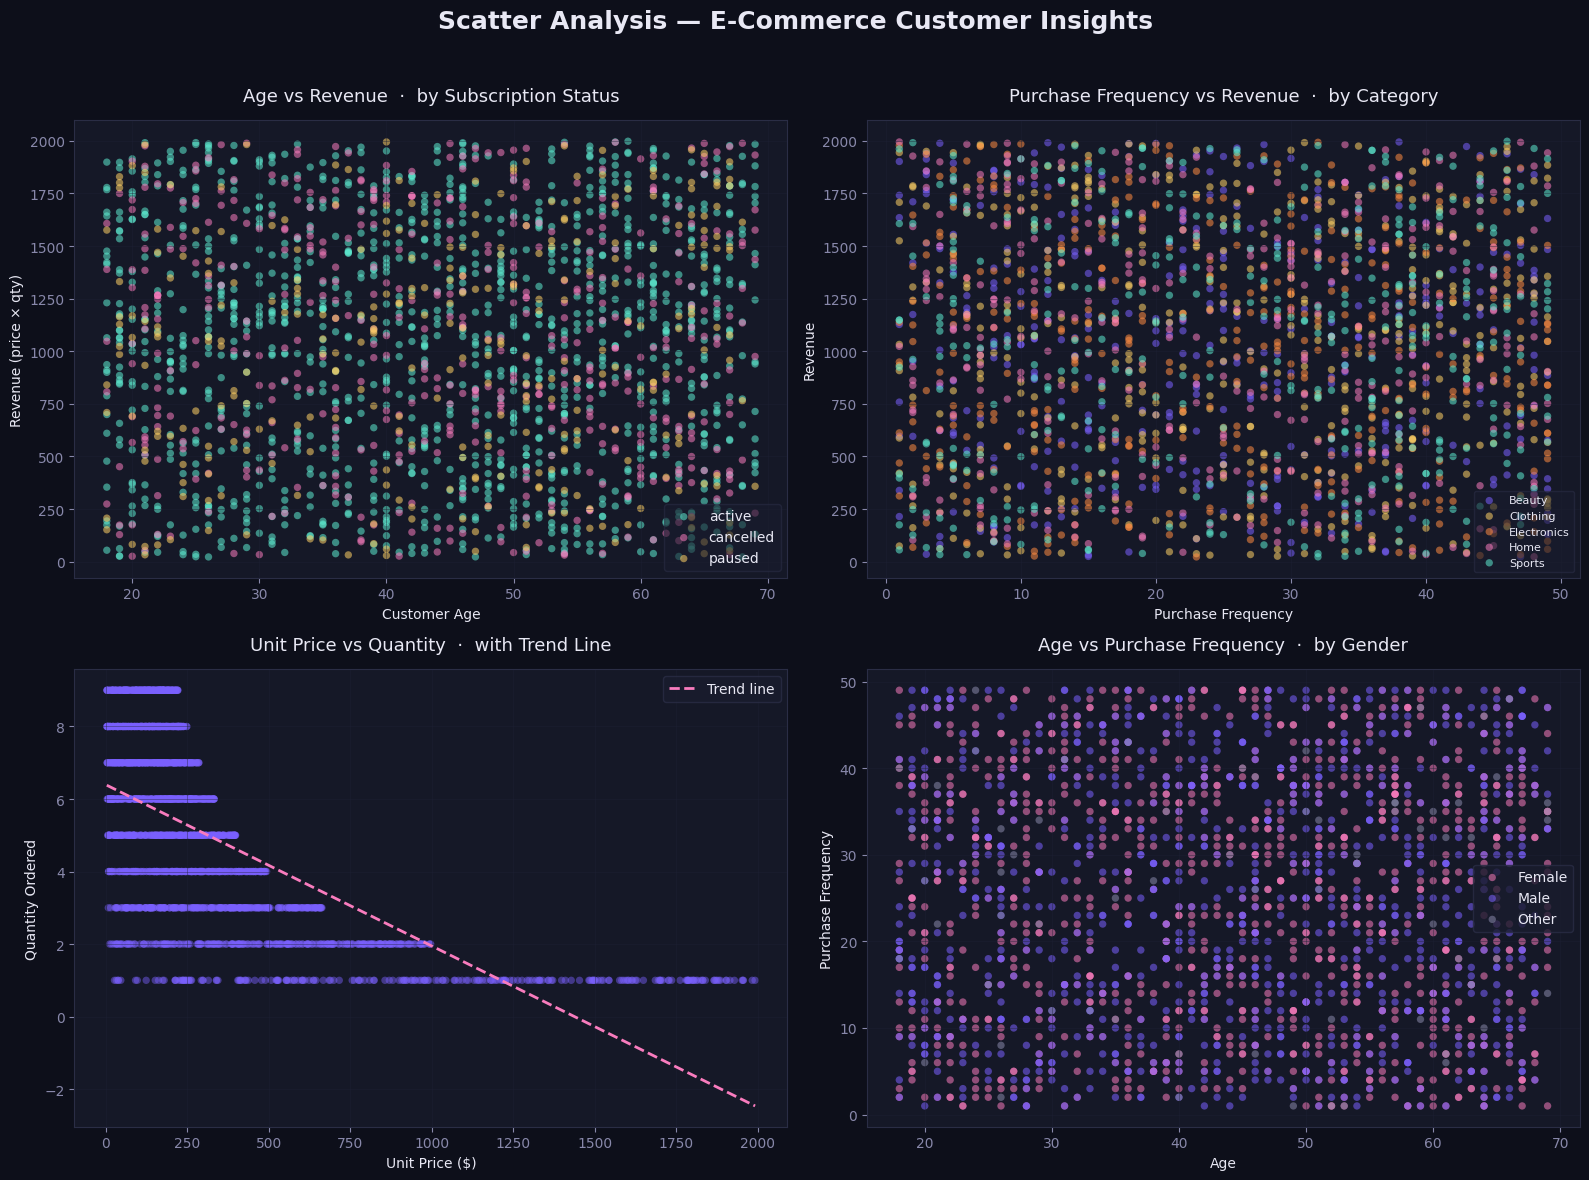

In [71]:
fig1, axes = plt.subplots(2, 2, figsize=(16, 12))
fig1.suptitle('Scatter Analysis — E-Commerce Customer Insights', fontsize=18,
              fontweight='bold', color=WHITE, y=0.98)
fig1.patch.set_facecolor(BG)

status_colors = {'active': ACC1, 'cancelled': ACC2, 'paused': ACC3}

# Age vs Revenue coloured by subscription status
ax = axes[0, 0]
for status, grp in df.groupby('subscription_status'):
    ax.scatter(grp['age'], grp['revenue'],
               c=status_colors.get(status, GREY), alpha=0.55, s=28,
               label=status, edgecolors='none')
ax.set_title('Age vs Revenue  ·  by Subscription Status')
ax.set_xlabel('Customer Age'); ax.set_ylabel('Revenue (price × qty)')
ax.grid(True, alpha=0.4); ax.legend(framealpha=0.6)

# Purchase Frequency vs Revenue coloured by category
ax = axes[0, 1]
cats = df['category'].unique()
cmap = {c: PALETTE_CAT[i % len(PALETTE_CAT)] for i, c in enumerate(cats)}
for cat, grp in df.groupby('category'):
    ax.scatter(grp['purchase_frequency'], grp['revenue'],
               c=cmap[cat], alpha=0.55, s=28, label=cat, edgecolors='none')
ax.set_title('Purchase Frequency vs Revenue  ·  by Category')
ax.set_xlabel('Purchase Frequency'); ax.set_ylabel('Revenue')
ax.grid(True, alpha=0.4); ax.legend(framealpha=0.6, fontsize=8)

# 1c) Unit Price vs Quantity with regression line
ax = axes[1, 0]
ax.scatter(df['unit_price'], df['quantity'],
           c=ACC4, alpha=0.45, s=28, edgecolors='none')
m, b = np.polyfit(df['unit_price'], df['quantity'], 1)
xs = np.linspace(df['unit_price'].min(), df['unit_price'].max(), 200)
ax.plot(xs, m*xs+b, color=ACC2, lw=2, linestyle='--', label='Trend line')
ax.set_title('Unit Price vs Quantity  ·  with Trend Line')
ax.set_xlabel('Unit Price ($)'); ax.set_ylabel('Quantity Ordered')
ax.grid(True, alpha=0.4); ax.legend()

# Age vs Purchase Frequency coloured by Gender
ax = axes[1, 1]
gender_col = {'Male': ACC4, 'Female': ACC2}
for g, grp in df.groupby('gender'):
    ax.scatter(grp['age'], grp['purchase_frequency'],
               c=gender_col.get(g, GREY), alpha=0.55, s=28,
               label=g, edgecolors='none')
ax.set_title('Age vs Purchase Frequency  ·  by Gender')
ax.set_xlabel('Age'); ax.set_ylabel('Purchase Frequency')
ax.grid(True, alpha=0.4); ax.legend()

fig1.tight_layout(rect=[0, 0, 1, 0.96])
fig1.savefig(r'C:\Users\sumeet\Desktop\customer churn\images\fig1_scatter.png', dpi=150, bbox_inches='tight', facecolor=BG)
plt.show()
plt.close(fig1)



In [ ]:
# HEATMAPS

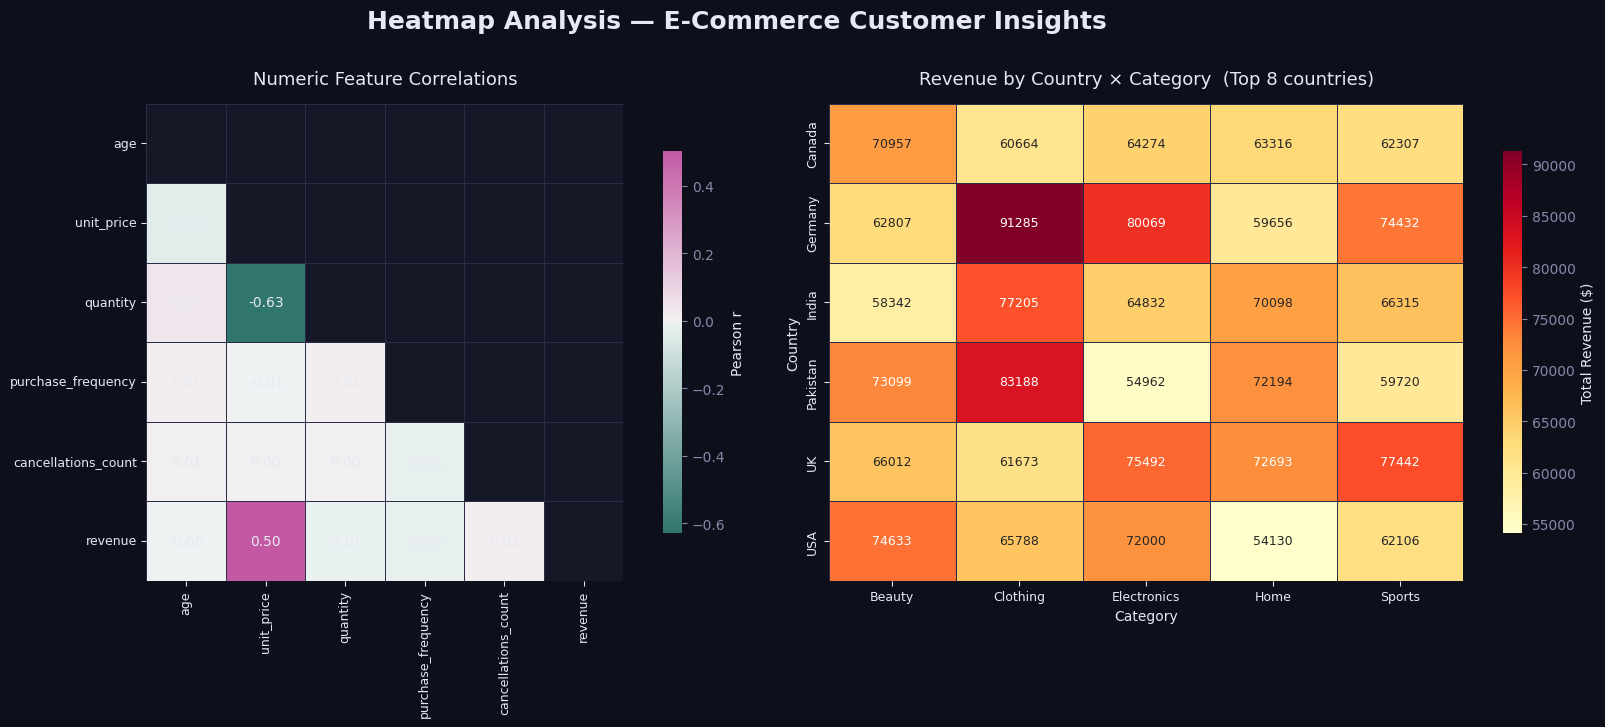

In [70]:
fig2, axes = plt.subplots(1, 2, figsize=(18, 7))
fig2.suptitle('Heatmap Analysis — E-Commerce Customer Insights', fontsize=18,
              fontweight='bold', color=WHITE, y=1.01)
fig2.patch.set_facecolor(BG)

# 2a) Correlation heatmap of numeric features
ax = axes[0]
num_cols = ['age', 'unit_price', 'quantity', 'purchase_frequency',
            'cancellations_count', 'revenue']
corr = df[num_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap_cool = sns.diverging_palette(180, 330, s=80, l=45, as_cmap=True)
sns.heatmap(corr, mask=mask, ax=ax, annot=True, fmt='.2f',
            cmap=cmap_cool, center=0, square=True,
            linewidths=0.5, linecolor='#2a2d45',
            cbar_kws={'shrink': 0.8, 'label': 'Pearson r'},
            annot_kws={'size': 10, 'color': WHITE})
ax.set_title('Numeric Feature Correlations', fontsize=13)
ax.tick_params(colors=WHITE, labelsize=9)

# 2b) Revenue by Country × Category pivot heatmap
ax = axes[1]
top_countries = df.groupby('country')['revenue'].sum().nlargest(8).index
top_cats      = df.groupby('category')['revenue'].sum().nlargest(6).index
pivot = (df[df['country'].isin(top_countries) & df['category'].isin(top_cats)]
         .groupby(['country', 'category'])['revenue']
         .sum().unstack(fill_value=0))
sns.heatmap(pivot, ax=ax, annot=True, fmt='.0f',
            cmap='YlOrRd', linewidths=0.5, linecolor='#2a2d45',
            cbar_kws={'shrink': 0.8, 'label': 'Total Revenue ($)'},
            annot_kws={'size': 9})
ax.set_title('Revenue by Country × Category  (Top 8 countries)', fontsize=13)
ax.set_xlabel('Category'); ax.set_ylabel('Country')
ax.tick_params(colors=WHITE, labelsize=9)

fig2.tight_layout()
fig2.savefig(r'C:\Users\sumeet\Desktop\customer churn\images\fig2_heatmap.png', dpi=150, bbox_inches='tight', facecolor=BG)
plt.show()
plt.close(fig2)



In [ ]:
#SALES / COUNTRY MAP 

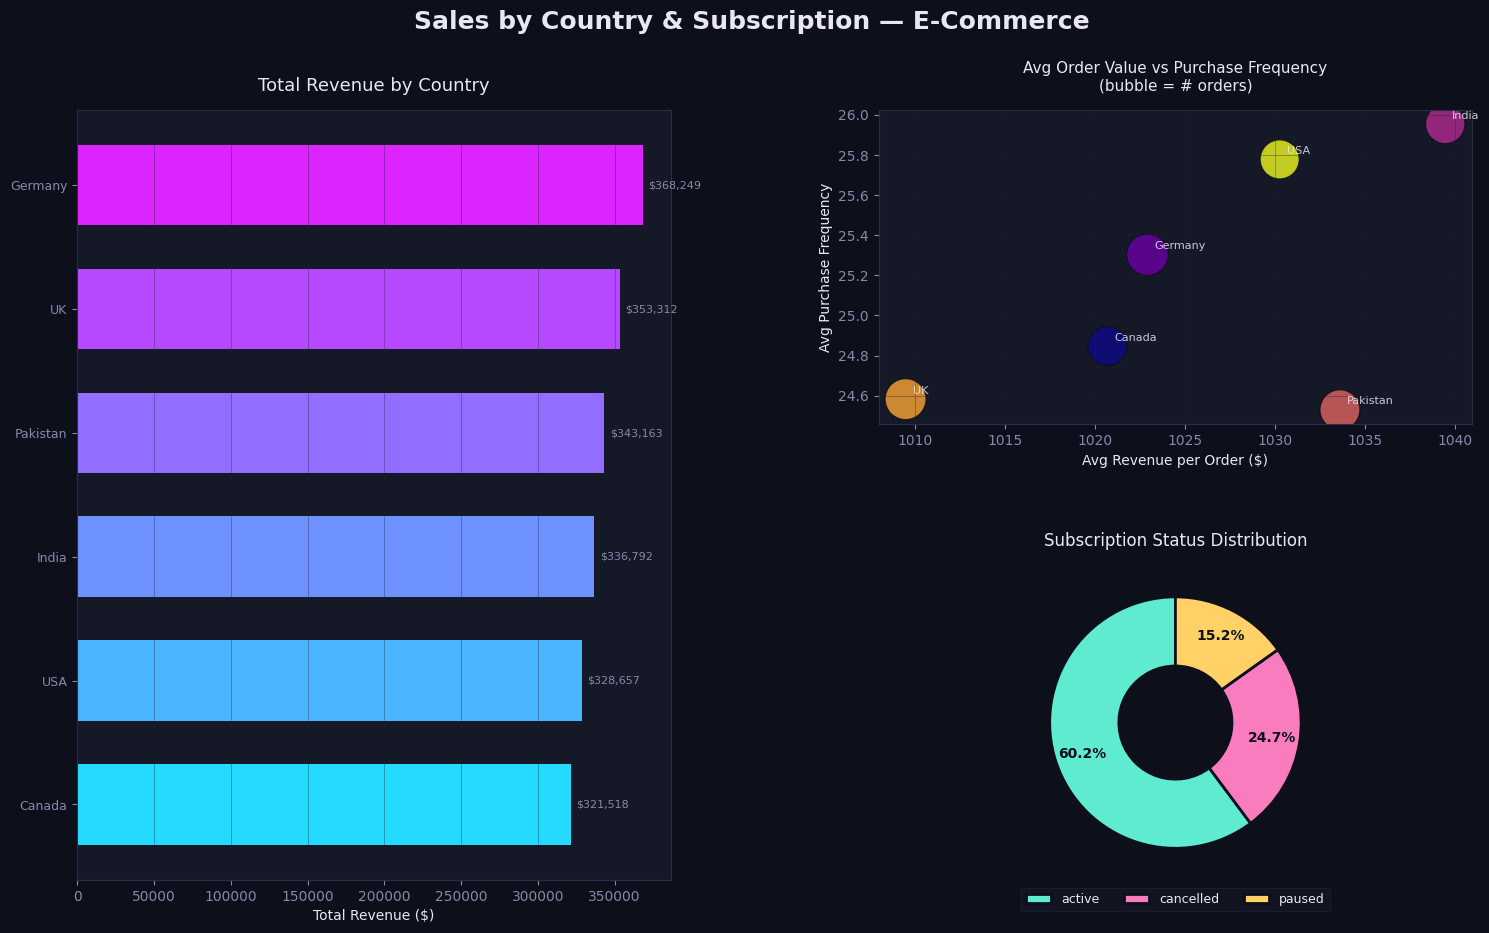

In [72]:
fig3 = plt.figure(figsize=(18, 10))
fig3.patch.set_facecolor(BG)
gs = gridspec.GridSpec(2, 2, figure=fig3, hspace=0.45, wspace=0.35)

ax_bar  = fig3.add_subplot(gs[:, 0])   # left — full height bar chart
ax_bub  = fig3.add_subplot(gs[0, 1])   # top-right — bubble chart
ax_pie  = fig3.add_subplot(gs[1, 1])   # bottom-right — pie

fig3.suptitle('Sales by Country & Subscription — E-Commerce', fontsize=18,
              fontweight='bold', color=WHITE, y=0.98)

# 3a) Horizontal bar — total revenue by country
country_rev = df.groupby('country')['revenue'].sum().sort_values()
colors_bar  = sns.color_palette("cool", len(country_rev))
bars = ax_bar.barh(country_rev.index, country_rev.values,
                   color=colors_bar, edgecolor='none', height=0.65)
ax_bar.set_title('Total Revenue by Country', fontsize=13)
ax_bar.set_xlabel('Total Revenue ($)')
ax_bar.grid(axis='x', alpha=0.35)
ax_bar.tick_params(axis='y', labelsize=9)
for bar, val in zip(bars, country_rev.values):
    ax_bar.text(val + country_rev.max()*0.01, bar.get_y()+bar.get_height()/2,
                f'${val:,.0f}', va='center', fontsize=8, color=GREY)

# 3b) Bubble — country: avg order value (x) × purchase frequency (y) × bubble=orders
country_stats = df.groupby('country').agg(
    avg_order=('revenue', 'mean'),
    avg_freq=('purchase_frequency', 'mean'),
    orders=('order_id', 'count')
).reset_index()
sc = ax_bub.scatter(country_stats['avg_order'], country_stats['avg_freq'],
                    s=country_stats['orders']*2.5,
                    c=range(len(country_stats)),
                    cmap='plasma', alpha=0.8, edgecolors=BG, linewidths=1)
for _, row in country_stats.iterrows():
    ax_bub.annotate(row['country'],
                    (row['avg_order'], row['avg_freq']),
                    textcoords='offset points', xytext=(5, 4),
                    fontsize=8, color=WHITE, alpha=0.85)
ax_bub.set_title('Avg Order Value vs Purchase Frequency\n(bubble = # orders)',
                 fontsize=11)
ax_bub.set_xlabel('Avg Revenue per Order ($)')
ax_bub.set_ylabel('Avg Purchase Frequency')
ax_bub.grid(True, alpha=0.35)

# 3c) Donut — subscription status share
status_cnt = df['subscription_status'].value_counts()
donut_colors = [ACC1, ACC2, ACC3]
wedges, texts, autotexts = ax_pie.pie(
    status_cnt.values, labels=None,
    autopct='%1.1f%%', startangle=90,
    colors=donut_colors, pctdistance=0.78,
    wedgeprops={'linewidth': 2, 'edgecolor': BG, 'width': 0.55})
for at in autotexts:
    at.set_color(BG); at.set_fontsize(10); at.set_fontweight('bold')
ax_pie.legend(wedges, status_cnt.index, loc='lower center',
              ncol=3, framealpha=0.4, fontsize=9,
              bbox_to_anchor=(0.5, -0.12))
ax_pie.set_title('Subscription Status Distribution', fontsize=12)

fig3.savefig(r'C:\Users\sumeet\Desktop\customer churn\images\fig3_sales_country.png', dpi=150, bbox_inches='tight', facecolor=BG)
plt.show()
plt.close(fig3)

In [ ]:
#CHURN & DISTRIBUTION INSIGHTS

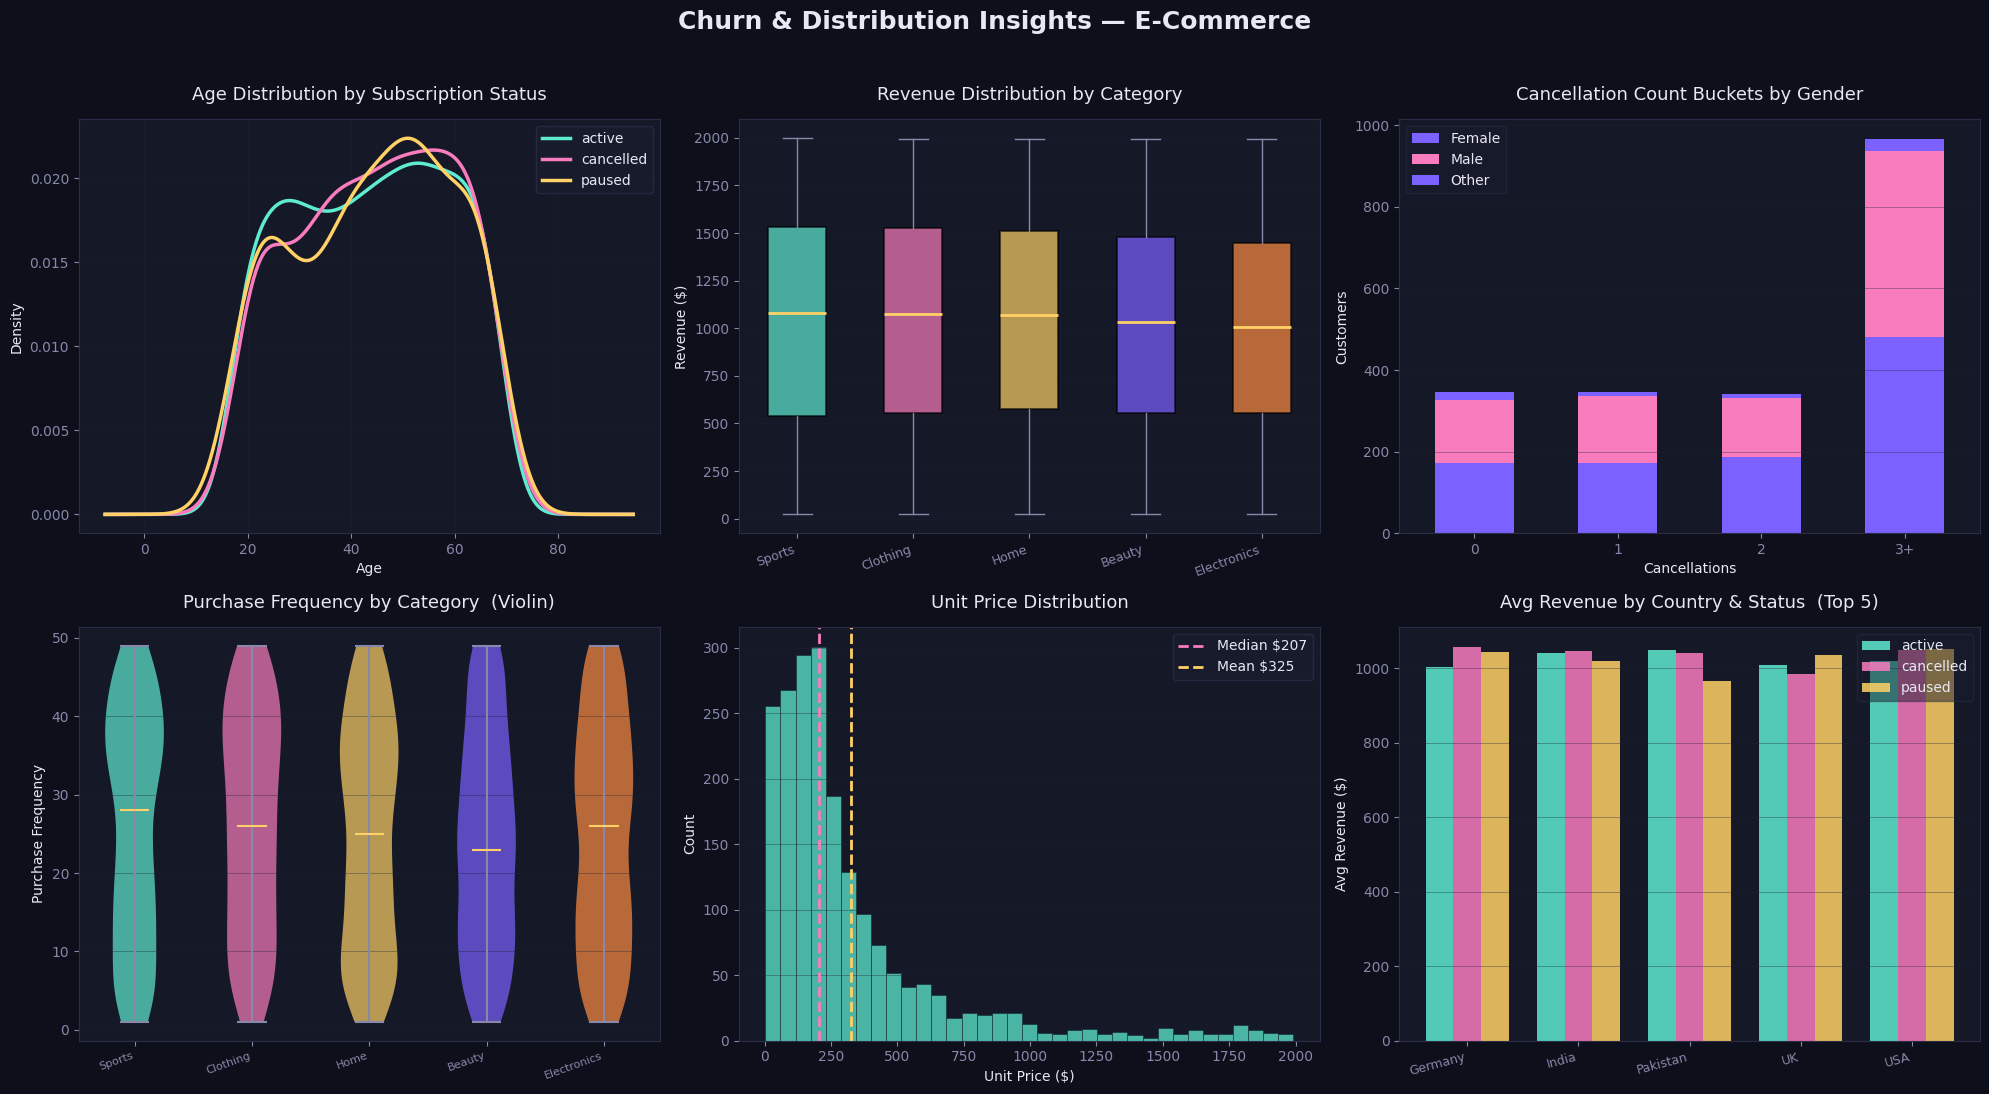

In [73]:
fig4, axes = plt.subplots(2, 3, figsize=(20, 11))
fig4.suptitle('Churn & Distribution Insights — E-Commerce', fontsize=18,
              fontweight='bold', color=WHITE, y=0.99)
fig4.patch.set_facecolor(BG)

# KDE — Age by subscription status
ax = axes[0, 0]
for status, grp in df.groupby('subscription_status'):
    grp['age'].plot.kde(ax=ax, color=status_colors[status], linewidth=2.5,
                        label=status)
ax.fill_between([], [], [], color='none')  # spacer
ax.set_title('Age Distribution by Subscription Status')
ax.set_xlabel('Age'); ax.set_ylabel('Density')
ax.grid(True, alpha=0.35); ax.legend()

# Box — Revenue by Category
ax = axes[0, 1]
cats_sorted = df.groupby('category')['revenue'].median().sort_values(ascending=False).index
bp = ax.boxplot([df[df['category']==c]['revenue'].values for c in cats_sorted],
                patch_artist=True, notch=False,
                medianprops={'color': ACC3, 'linewidth': 2},
                boxprops={'linewidth': 1.2},
                whiskerprops={'color': GREY},
                capprops={'color': GREY},
                flierprops={'marker':'o','markersize':3,'markerfacecolor':GREY,
                            'alpha':0.4,'linestyle':'none'})
for patch, color in zip(bp['boxes'], PALETTE_CAT):
    patch.set_facecolor(color); patch.set_alpha(0.7)
ax.set_xticklabels(cats_sorted, fontsize=9, rotation=20, ha='right')
ax.set_title('Revenue Distribution by Category')
ax.set_ylabel('Revenue ($)'); ax.grid(axis='y', alpha=0.35)

#  Stacked bar — Cancellations bucket by gender
df['cancel_bucket'] = pd.cut(df['cancellations_count'],
                              bins=[-1,0,1,2,10], labels=['0','1','2','3+'])
pivot_cb = (df.groupby(['cancel_bucket','gender']).size()
              .unstack(fill_value=0))
pivot_cb.plot(kind='bar', ax=axes[0,2], color=[ACC4, ACC2],
              stacked=True, edgecolor='none', rot=0, width=0.55)
axes[0,2].set_title('Cancellation Count Buckets by Gender')
axes[0,2].set_xlabel('Cancellations'); axes[0,2].set_ylabel('Customers')
axes[0,2].grid(axis='y', alpha=0.35); axes[0,2].legend(framealpha=0.5)

# Violin — Purchase Frequency by Category
ax = axes[1, 0]
parts = ax.violinplot(
    [df[df['category']==c]['purchase_frequency'].values for c in cats_sorted],
    positions=range(len(cats_sorted)), showmedians=True)
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(PALETTE_CAT[i % len(PALETTE_CAT)])
    pc.set_alpha(0.7); pc.set_edgecolor('none')
parts['cmedians'].set_color(ACC3)
parts['cbars'].set_color(GREY); parts['cmins'].set_color(GREY)
parts['cmaxes'].set_color(GREY)
ax.set_xticks(range(len(cats_sorted)))
ax.set_xticklabels(cats_sorted, fontsize=8, rotation=20, ha='right')
ax.set_title('Purchase Frequency by Category  (Violin)')
ax.set_ylabel('Purchase Frequency'); ax.grid(axis='y', alpha=0.35)

#  Histogram — Unit Price
ax = axes[1, 1]
ax.hist(df['unit_price'], bins=35, color=ACC1, alpha=0.75, edgecolor=BG, linewidth=0.4)
ax.axvline(df['unit_price'].median(), color=ACC2, linestyle='--', lw=2,
           label=f'Median ${df["unit_price"].median():.0f}')
ax.axvline(df['unit_price'].mean(), color=ACC3, linestyle='--', lw=2,
           label=f'Mean ${df["unit_price"].mean():.0f}')
ax.set_title('Unit Price Distribution')
ax.set_xlabel('Unit Price ($)'); ax.set_ylabel('Count')
ax.grid(axis='y', alpha=0.35); ax.legend()

# 4f) Grouped bar — Avg Revenue by Country × Subscription Status
ax = axes[1, 2]
top5 = df.groupby('country')['revenue'].sum().nlargest(5).index
sub_rev = (df[df['country'].isin(top5)]
           .groupby(['country','subscription_status'])['revenue'].mean()
           .unstack(fill_value=0))
x = np.arange(len(sub_rev))
w = 0.25
for i, (col, color) in enumerate(zip(sub_rev.columns, [ACC1, ACC2, ACC3])):
    ax.bar(x + i*w, sub_rev[col], width=w, color=color, label=col,
           alpha=0.85, edgecolor='none')
ax.set_xticks(x + w)
ax.set_xticklabels(sub_rev.index, fontsize=9, rotation=15, ha='right')
ax.set_title('Avg Revenue by Country & Status  (Top 5)')
ax.set_ylabel('Avg Revenue ($)'); ax.grid(axis='y', alpha=0.35)
ax.legend(framealpha=0.5)

fig4.tight_layout(rect=[0, 0, 1, 0.97])
fig4.savefig(r'C:\Users\sumeet\Desktop\customer churn\images\fig4_churn_dist.png', dpi=150, bbox_inches='tight', facecolor=BG)
plt.show()
plt.close(fig4)